
<div style="border: 5px solid purple; padding: 15px; margin: 5px">
<b> Reviewer's comment 2</b>

Thank you for sending the updated version of the project 😊 You did a great job! I really appreciate the time you took to make these improvements. However, there are still a couple of issues that need your attention. I described everything in my new comments titled as **Reviewer's comment 2**. Please take a look :)
    

</div>

<div style="border: 5px solid purple; padding: 15px; margin: 5px">
<b> Reviewer's comment</b>
    
Hi Dianus, my name is Svetlana (https://hub.tripleten.com/u/855fe797). Congratulations on submitting another project! 🎉
    

Before we start, I want to pay your attention to the color marking:
    

<div style="border: 5px solid green; padding: 15px; margin: 5px">

Great solutions and ideas that can and should be used in the future are in green comments. Some of them are: 
    
    
- You have successfully prepared the subsets. It is important to split the data correctly in order to ensure there's no intersection;    
    
    

- Excluded an irrelevant column; 
    
    
- Compared several algorithms on resampled data; 


- Compared at least two approaches to handle class imbalance;

    
- Used two algorithms to train models on resampled data; 

    
- Initialized and correctly used resampling function; 

    
<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b> Reviewer's comment </b>

Yellow color indicates what should be optimized. This is not necessary, but it will be great if you make changes to this project. I've left several recommendations throughout the project. Please take a look.
 
</div>
<div style="border: 5px solid red; padding: 15px; margin: 5px">
<b> Reviewer's comment </b>

Issues that must be corrected to achieve accurate results are indicated in red comments. Please note that the project cannot be accepted until these issues are resolved. 
</div>        
<hr>
    
<font color='dodgerblue'>**To sum up:**</font> you did a great job here, thank you so much! Actually the project is almost perfect, and the updates should not take much time. If you have any questions, please feel free to ask. I will wait the project for the second review 😊 
    

<hr>
    
Please use some color other than those listed to highlight answers to my comments.
I would also ask you **not to change, move or delete my comments** to make it easier for me to navigate during the next review.
    
<hr> 
    
✍️ Here's a link to [Supervised Learning documenation sections](https://scikit-learn.org/stable/supervised_learning.html) that you may find useful. I also want to recommend [Class Imbalance Strategies — A Visual Guide with Code](https://medium.com/towards-data-science/class-imbalance-strategies-a-visual-guide-with-code-8bc8fae71e1a) article.
    
<hr>
    
📌 Please feel free to schedule a 1:1 sessions with our tutors or TAs [here](https://calendly.com/tripleten-ds-experts-team), join daily coworking sessions, or ask questions on TripleTen Hub if you need assistance 😉 
</div>

</div>
<div style="border: 5px solid blue; padding: 15px; margin: 5px">
<b> Student's comment </b>
</br></br>
Svetlana, thank you for your assistance. My own answers to your comments will be in blue.
</div>        
<hr>


## Sprint 8 Project


### A. Introduction

This particular project is to gauge the churn at Beta Bank. Think of churn as the basic turnover rate amongst customer base, which can happen for a number of reasons ranging from customer service performance, to fraudsters breezing through the bank, to different life circumstances such as location change, death, divorce, etc. This project analyzes data from 10,000 customers from Beta Bank in order to train an effective model that is able to recognize customers primed for churn, which we don't want. In an attempt to both meet customer needs to prevent churn, and meet business needs by retraining customers, the conclusions extracted from this data can be enacted in business stragegies that will achieve this goals and and additionally give enough quality information to bring in long-term, reliable, high-yield customers.</br>

</br>
Following requisite library initialization, the project contains three main parts that 1) refine, 2) explore, and 3) functionalize the data. Data download and initialization populates the dataframe with our 10,000 customers and the features that we are using to predict the target, which is churn. We want to zero in on churn values of one within the dataframe, indicating the customer left the Bank, and will use applicable information from the features as predictive variables within several different models to gauge F1 score and AUC-ROC, which roughly collaborate to establish actionable predictions that account for precision and recall scores that signify which model can be best used to plan business strategies.

### B. Initialize Libraries

In [99]:
import pandas as pd
pd.set_option('display.float_format', lambda x: f'{x:f}') # Prevent scientific notation for readability
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler



### C. Download and Prepare Data


##### 1. Download data, check it out, and clean it

In [100]:
# Load dataset from Github URL
url = 'https://raw.githubusercontent.com/DHE42/sprint_8_repository/refs/heads/main/Churn.csv'

# Define dataset as df
df = pd.read_csv(url)

# Display first few rows of the dataframe
display(df.head())
print()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.000000,0.000000,1,1,1,101348.880000,1
1,2,15647311,Hill,608,Spain,Female,41,1.000000,83807.860000,1,0,1,112542.580000,0
2,3,15619304,Onio,502,France,Female,42,8.000000,159660.800000,3,1,0,113931.570000,1
3,4,15701354,Boni,699,France,Female,39,1.000000,0.000000,2,0,0,93826.630000,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.000000,125510.820000,1,1,1,79084.100000,0


Let's clean this up by making the column names clearer and putting them in lowercase/snakecase. I'll also take out superfluous columns. Then, I will check for duplicates.

In [101]:
# Remove superfluous columns
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

# Rename columns for clarity, then manually make lower case and snakecase for best practice
df.rename(columns={
    'CreditScore': 'credit_score',
    'Geography': 'country',
    'Gender': 'gender',
    'Age': 'age',
    'Tenure': 'tenure',
    'Balance': 'balance',
    'NumOfProducts': 'product_amount',
    'HasCrCard': 'credit_card',
    'IsActiveMember': 'active_customer',
    'EstimatedSalary': 'estimated_salary',
    'Exited': 'churn'
}, inplace=True)

# Put all categorical variables in lowercase
categorical_columns = ['country', 'gender']
for col in categorical_columns:
    df[col] = df[col].str.lower()

# Print updated rows
display(df.head())

# Check for duplicates
duplicates = df.duplicated().sum()
print(f'Number of duplicate rows: {duplicates}\n')

,credit_score,country,gender,age,tenure,balance,product_amount,credit_card,active_customer,estimated_salary,churn
0,619,france,female,42,2.000000,0.000000,1,1,1,101348.880000,1
1,608,spain,female,41,1.000000,83807.860000,1,0,1,112542.580000,0
2,502,france,female,42,8.000000,159660.800000,3,1,0,113931.570000,1
3,699,france,female,39,1.000000,0.000000,2,0,0,93826.630000,0
4,850,spain,female,43,2.000000,125510.820000,1,1,1,79084.100000,0


Number of duplicate rows: 0




<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    

You can also use the following code: 



`df.columns = df.columns.str.replace(r"([A-Z])", r" \1").str.lower().str.replace(' ', '_').str[1:]`

</div>


</div>
<div style="border: 5px solid blue; padding: 15px; margin: 5px">
<b> Student's comment </b>


The above code produces column names with the first leter of every column erased (see below), so I don't feel comfortable using the above code since I will just need to manually rename them anyway. Tried restarting the kernel, etc., and still gives that result. </br>

ownumber</br>ustomerid</br>urname</br>reditscore</br>eography</br>ender</br>ge</br>enure</br>alance</br>umofproducts</br>ascrcard</br>sactivemember </br>stimatedsalary</br>xited  

</div>        
<hr>



<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment 2</b>
    
Run it before you change the names:

</div>

In [102]:
# Reviewer's code 2
df2 = pd.read_csv(url)
df2.columns.str.replace(r"([A-Z])", r" \1").str.lower().str.replace(' ', '_').str[1:]

Index(['ownumber', 'ustomerid', 'urname', 'reditscore', 'eography', 'ender',
       'ge', 'enure', 'alance', 'umofproducts', 'ascrcard', 'sactivemember',
       'stimatedsalary', 'xited'],
      dtype='object')


</div>
<div style="border: 5px solid blue; padding: 15px; margin: 5px">
<b> Student's comment </b>

This is a screenshot of what I am seeing directly above this markdown cell as a result of the code you wrote.

</br></br>

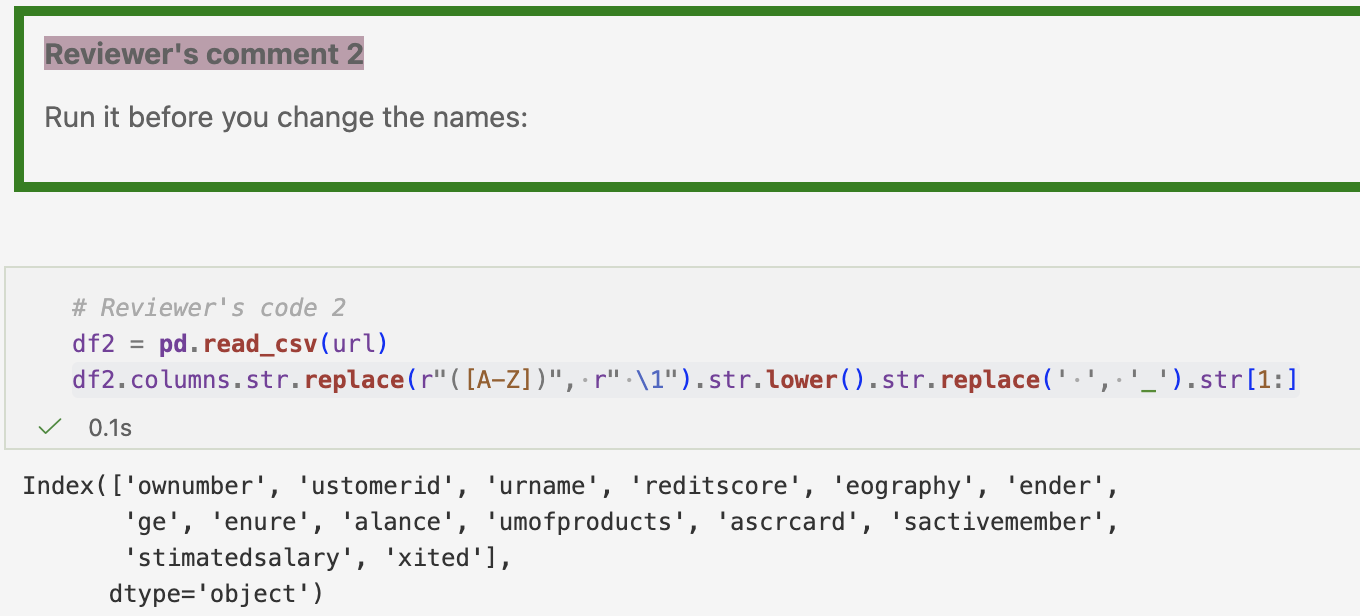

</div>        
<hr>

In [103]:
# Print unique values of gender column to see if more cleaning is needed
display(df['gender'].unique())
print()

array(['female', 'male'], dtype=object)

In [104]:
# Put boolean mask on gender column to make it easier to work with
df['gender'] = df['gender'].map({'male': 0, 'female': 1})


In [105]:
display(df.describe())    
print()

,credit_score,gender,age,tenure,balance,product_amount,credit_card,active_customer,estimated_salary,churn
count,10000.000000,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.454300,38.921800,4.997690,76485.889288,1.530200,0.705500,0.515100,100090.239881,0.203700
std,96.653299,0.497932,10.487806,2.894723,62397.405202,0.581654,0.455840,0.499797,57510.492818,0.402769
min,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,584.000000,0.000000,32.000000,2.000000,0.000000,1.000000,0.000000,0.000000,51002.110000,0.000000
50%,652.000000,0.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100193.915000,0.000000
75%,718.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.000000,1.000000,149388.247500,0.000000
max,850.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


<div style="border: 5px solid gold; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>

Consider using the `display` instead of `print` with dataframes as it provides better outputs.
</div>


</div>
<div style="border: 5px solid blue; padding: 15px; margin: 5px">
<b> Student's comment </b>

Above suggestion uniformly added throughout notebook.

</div>        
<hr>


In [106]:
# Replace null values in 'tenure' column with the median value since it is the best measure of central tendency for this data
median_tenure = df['tenure'].median()
df.fillna({'tenure': median_tenure}, inplace=True)

# Convert 'tenure' to integer type to save memory
df['tenure'] = df['tenure'].astype(int)

# Format estimated_salary and balance to have two decimal places for better readability
for col in ['estimated_salary', 'balance']:
    df[col] = df[col].astype(float).map('{:.2f}'.format)

# Display information about the dataframe
print(df.info())
print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   credit_score      10000 non-null  int64 
 1   country           10000 non-null  object
 2   gender            10000 non-null  int64 
 3   age               10000 non-null  int64 
 4   tenure            10000 non-null  int64 
 5   balance           10000 non-null  object
 6   product_amount    10000 non-null  int64 
 7   credit_card       10000 non-null  int64 
 8   active_customer   10000 non-null  int64 
 9   estimated_salary  10000 non-null  object
 10  churn             10000 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 859.5+ KB
None



In [107]:
# Doublecheck for null values
display(df.isnull().sum())
print()

credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
product_amount      0
credit_card         0
active_customer     0
estimated_salary    0
churn               0
dtype: int64

In [108]:
# Check for duplicate rows
display(df.duplicated().sum())
print()

0

In [109]:
# Print head() to see final cleaned dataframe
display(df.head())

,credit_score,country,gender,age,tenure,balance,product_amount,credit_card,active_customer,estimated_salary,churn
0,619,france,1,42,2,0.00,1,1,1,101348.88,1
1,608,spain,1,41,1,83807.86,1,0,1,112542.58,0
2,502,france,1,42,8,159660.80,3,1,0,113931.57,1
3,699,france,1,39,1,0.00,2,0,0,93826.63,0
4,850,spain,1,43,2,125510.82,1,1,1,79084.10,0


The dataframe has been cleaned to improve way memory space is used, enhance readibility, make binary columns easier to work with, and use data science best practices.</br></br>

Here are the final rows:/br></br>

    Features
</br>
customer_id — unique customer identifier</br>
surname — surname</br>
credit_score — credit score</br>
country — country of residence</br>
gender — 0 for male and 1 for female</br>
age — age</br>
tenure — period of maturation for a customer’s fixed deposit (years)</br>
balance — account balance</br>
product_amount — number of banking products used by the customer</br>
credit_card — customer has a credit card</br>
active_customer — customer’s activeness</br>
estimated_salary — estimated salary</br></br>

    Target
</br>
churn — 0 for no (unchurned) and 1 (churned) for yes


<div style="border: 5px solid red; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    

- There are several columns that do not influence the behavior and therefore are not very useful in our task. These are: `'CustomerId', 'Surname',`. 
    
    
- Consider checking for the duplicates after you drop these columns. When we delete a column, previously distinct rows may become duplicated. 


</div>
</div>

<div style="border: 5px solid blue; padding: 15px; margin: 5px">
<b> Student's comment </b>
</br></br>
Removed columns and checked for duplicates in beginning of section C.
</div>    

<hr>

<div style="border: 5px solid gold; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Before we move on to the machine learning models, it may be a good idea to display some charts to evaluate the distributions of different columns we have. For instance, do `Age`, `Salary` or other columns look normal? Do they have any outliers? Even if we don't use linear models, it still may be very helpful, since EDA helps us with feature engineering, which in some cases is a clue.
    
   
</div>


<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment 2</b>
    
Well done! 
</div>

</div>

<div style="border: 5px solid blue; padding: 15px; margin: 5px">
<b> Student's comment </b>
</br></br>
Added charts to section D.
</div>    




<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment 2</b>
    
Good! 
</div>

### D. Examine Preliminary Dataset

##### 1. Class (Im)balance

Let's take a look at some charts that will help us better understand the dataset that's been refined above.

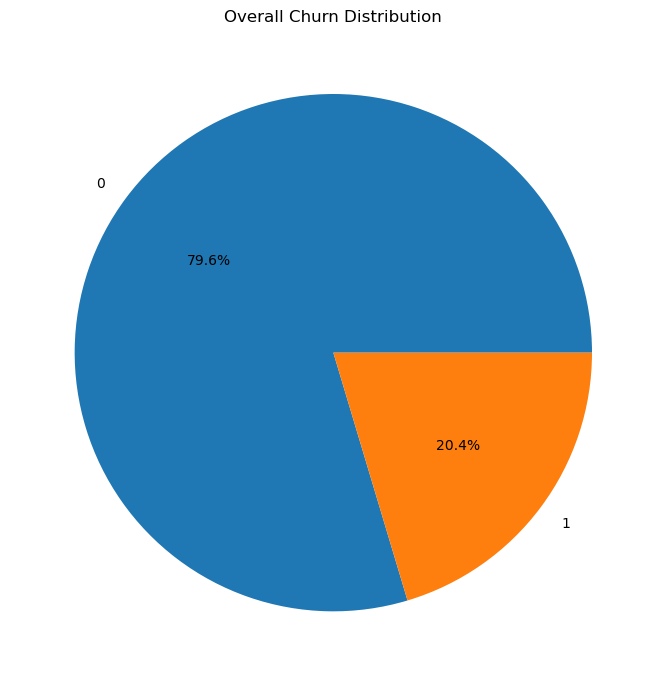

In [110]:
# Set up the plotting
plt.figure(figsize=(20, 15))

# 1. Churn Distribution (Pie Chart)
plt.subplot(2, 3, 1)
churn_counts = df['churn'].value_counts()
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%')
plt.title('Overall Churn Distribution')

# Adjust layout and show plots
plt.tight_layout()
plt.show()

The pie chart shows that a minority, approximately 20% or one fifth of the customer base, is made up of churners. This is good! For the majority, if it's broke, then don't fix it. We don't have to worry about them. For the minority here, we can continue investigating the specific churner demographics.

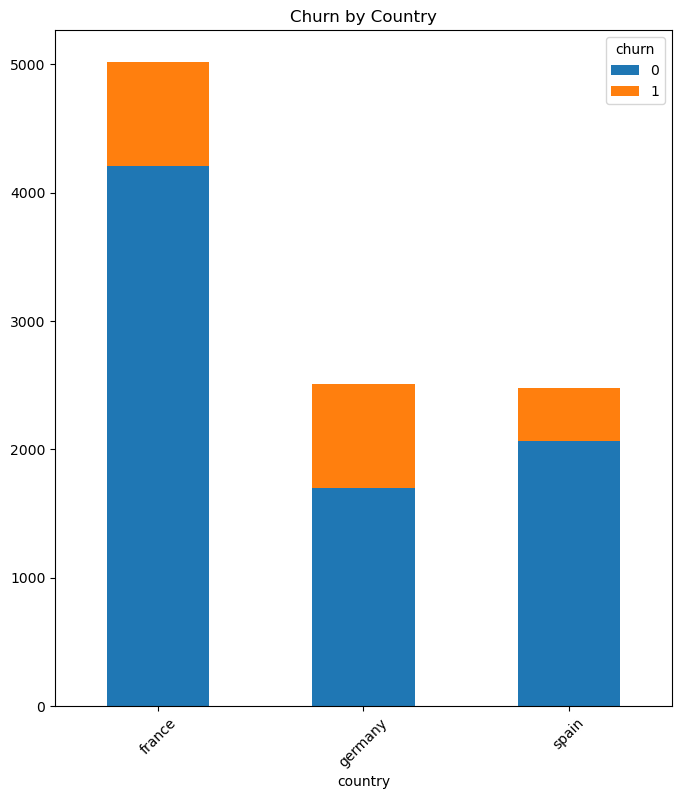

In [111]:
# Set up the plotting
plt.figure(figsize=(20, 15))

# 2. Categorical Column - Country Churn Distribution
plt.subplot(2, 3, 2)
country_churn = df.groupby(['country', 'churn']).size().unstack(fill_value=0)
country_churn.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Churn by Country')
plt.xticks(rotation=45)

# Adjust layout and show plots
plt.tight_layout()
plt.show()



This bar chart shows the distribution of customers betweent the three countries Beta Bank operates in (France, Germany, and Spain), and also shows the distribution of churners in those populations. Spain has the smallest customer base, and an amount of churners that is negligible compared to the overall customer base. The German churners are concerning, since they are the second largest market for Beta Bank, at about half the size of France, but have larger churn than france.

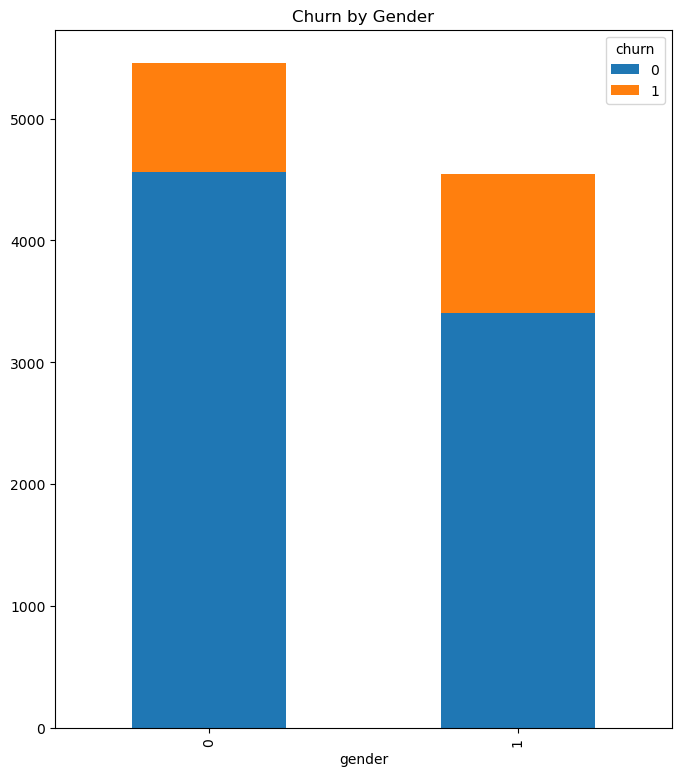

In [112]:
# Set up the plotting
plt.figure(figsize=(20, 15))

# 3. Categorical Column - Gender Churn Distribution
plt.subplot(2, 3, 3)
gender_churn = df.groupby(['gender', 'churn']).size().unstack(fill_value=0)
gender_churn.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Churn by Gender')

# Adjust layout and show plots
plt.tight_layout()
plt.show()



There are more men than women in the customer base, but women have larger churn than men. This is a problem. Beta Bank is underserving women in such a way that results in them leaving at a higher frequency overall, which is proportionally worrisome since there are few of them in the customer base.

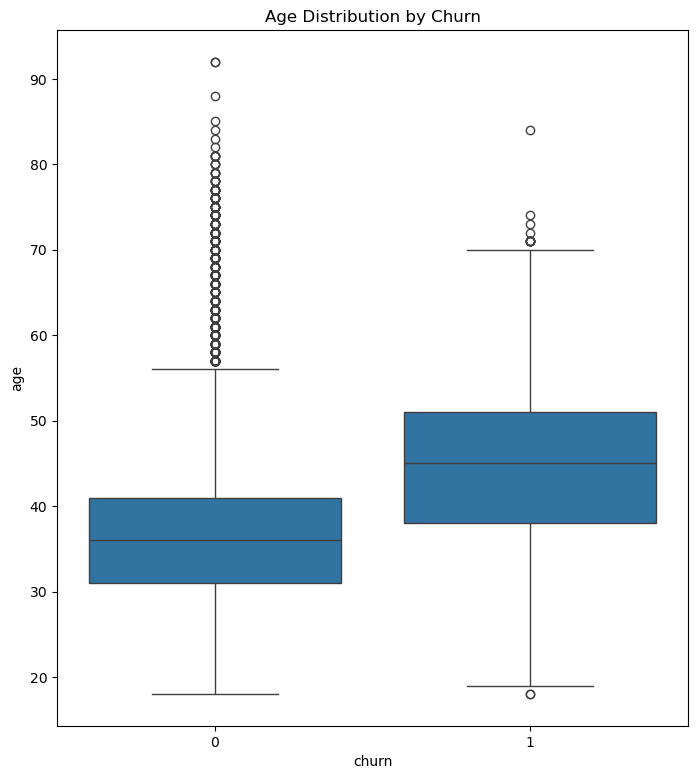

In [113]:
# Set up the plotting
plt.figure(figsize=(20, 15))

# 4. Numerical Column - Age Distribution by Churn
plt.subplot(2, 3, 4)
sns.boxplot(x='churn', y='age', data=df)
plt.title('Age Distribution by Churn')

# Adjust layout and show plots
plt.tight_layout()
plt.show()



It looks like churners tend to be about 45, with an insignificant outlier at age 18 (not important since this is likely a single low revenue customer), and outliers beyond the top whisker of the boxplot over about the age of 70. We are starting to get a better picture for the specific kinds of customers retention efforts should be aimed at. So far, we had the no-churn/churn dichotomy. We we sliced the apple more thinly by country, gender, and now age. Our cross-section now indicates that many churners may be German women between the ages of 38 and 52. Let's proceed to look at credit score.

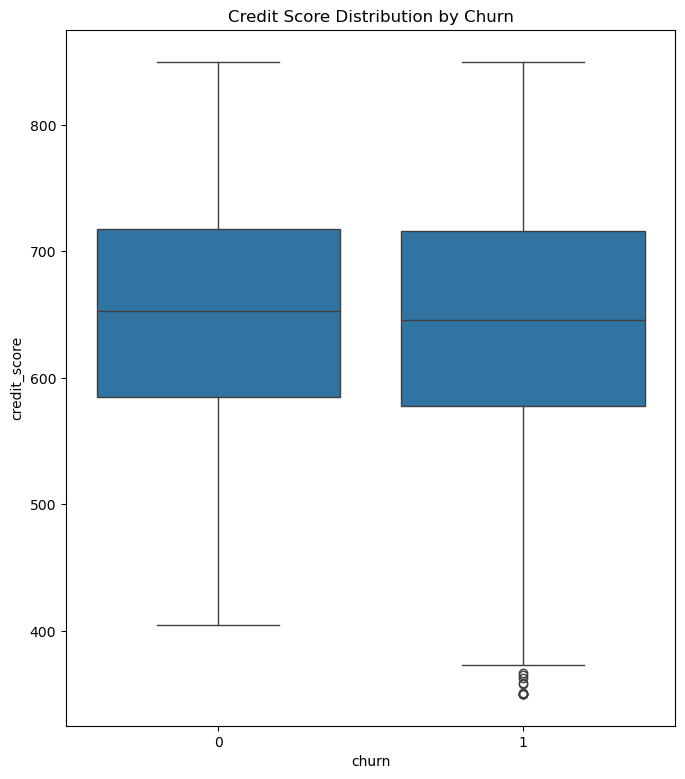

In [114]:
# Set up the plotting
plt.figure(figsize=(20, 15))

# 5. Numerical Column - Credit Score Distribution by Churn
plt.subplot(2, 3, 5)
sns.boxplot(x='churn', y='credit_score', data=df)
plt.title('Credit Score Distribution by Churn')

# Adjust layout and show plots
plt.tight_layout()
plt.show()



The 50th percentile for credit score is approximately the same between non-churners and churners, about about 650, with churners being slightly lower. Overall, churners tend to have a broader range of credit scores, with notable low outliers beyond the bottom whisker of the churner blox plot, with overall scores consistently being slightly lower than non-churners.

<Figure size 2000x1500 with 0 Axes>

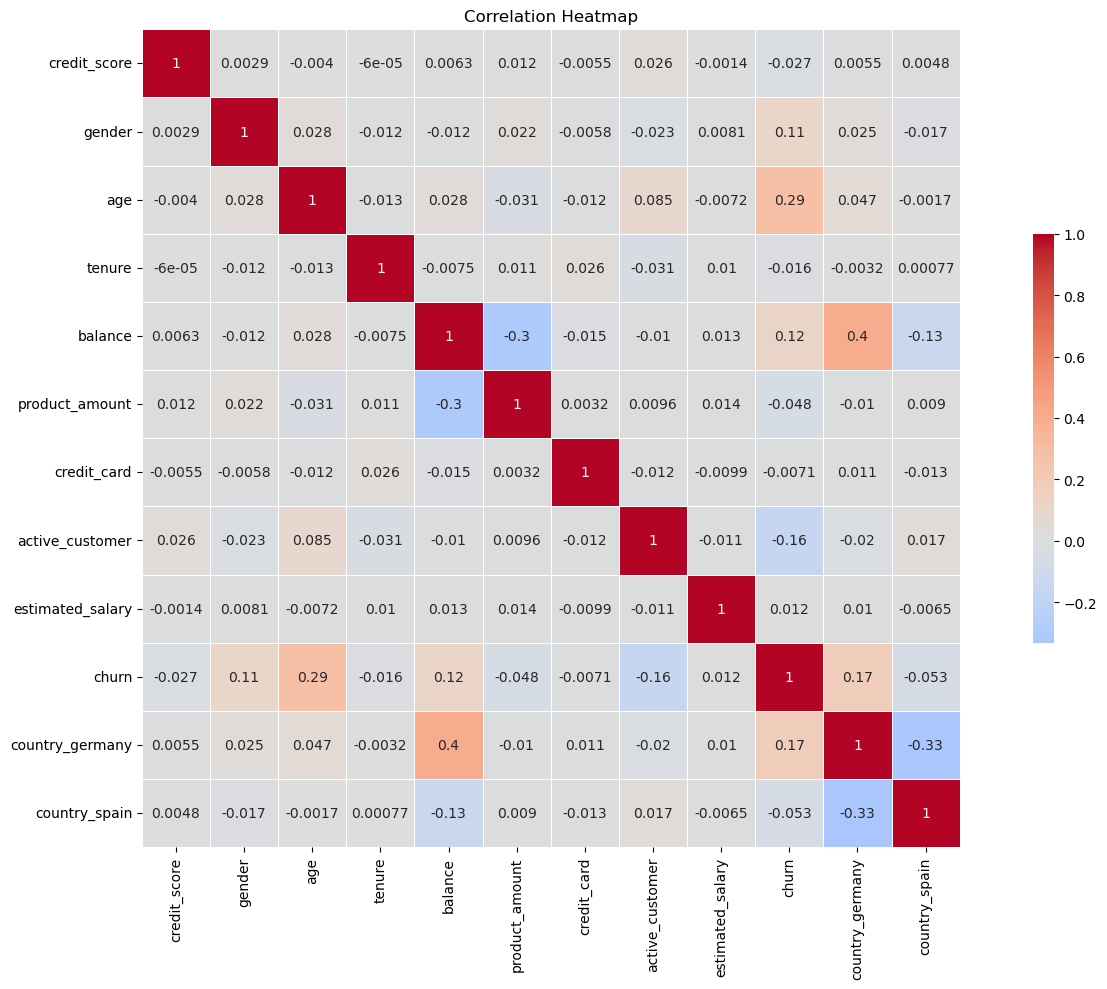

In [115]:
# Set up the plotting
plt.figure(figsize=(20, 15))

# 6. Correlation Heatmap

# Set up OHE for country by converting to dummy variables
df_encoded = pd.get_dummies(df, columns=['country'], drop_first=True)

# Recompute correlation with the new columns
correlation_matrix = df_encoded.corr()

# Plot heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .5})
plt.title('Correlation Heatmap')

# Adjust layout and show plots
plt.tight_layout()
plt.show()



With France as the baseline, since it is the most successful market for customer retention at this point, the heatmap shows that Germans churn significantly more than other countries, and that women churn slightly more than men. Other features don't have a significant enough influence to target. Overall, focusing on what is going wrong in Germany is the ticket here, with individual circumstances having a greater bearing on individual cases which can be handled by frontline customer service workers as needed using information gleaned from the heatmap.


<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment 2</b>
    
Very good analysis! 
</div>

In [116]:
# Additional Class Imbalance Information
print("\nClass Imbalance Details:")
churn_distribution = df['churn'].value_counts(normalize=True)
print("\nChurn Distribution:")
display(churn_distribution)

# Churn rates by categorical variables
categorical_columns = ['gender', 'country', 'credit_card', 'active_customer']
for col in categorical_columns:
    print(f"\nChurn Rate by {col}:")
    display(df.groupby(col)['churn'].mean())


Class Imbalance Details:

Churn Distribution:


churn
0   0.796300
1   0.203700
Name: proportion, dtype: float64


Churn Rate by gender:


gender
0   0.164559
1   0.250715
Name: churn, dtype: float64


Churn Rate by country:


country
france    0.161548
germany   0.324432
spain     0.166734
Name: churn, dtype: float64


Churn Rate by credit_card:


credit_card
0   0.208149
1   0.201843
Name: churn, dtype: float64


Churn Rate by active_customer:


active_customer
0   0.268509
1   0.142691
Name: churn, dtype: float64

It appears that our class imbalances indicate that German customers have a much higher churn by virtue of being located in Germany, as the heatmap corroborates.

##### 2. Training the Imbalanced Model

Let's get some baseline scores on a decision tree classifier model and logistic regression model to see how well our pre-processed data fares prior to tweaking methods like scaling.

In [117]:
# Divide features and target prior to encoding for leakage avoidance
target = df['churn']
features = df.drop('churn', axis=1)

# Split the data
features_train, features_temp, target_train, target_temp = train_test_split(
    features, target, test_size=0.4, random_state=12345
)

# Split into validation and test sets (3:1:1 overall)
features_valid, features_test, target_valid, target_test = train_test_split(
    features_temp, target_temp, test_size=0.5, random_state=12345
)

# Post-split encoding
categorical = features_train.select_dtypes(exclude=[np.number]).columns

non_numeric_columns = [
    col for col in categorical
    if features_train[col].nunique() < 20
]

# Copies for holding encoded data
encoded_features_train = features_train.copy()
encoded_features_valid = features_valid.copy()
encoded_features_test  = features_test.copy()

encoders = {}

for col in non_numeric_columns:
    le = LabelEncoder()
    
    # Fit on training column only (as strings)
    train_vals = encoded_features_train[col].astype(str)
    le.fit(train_vals)
    encoders[col] = le
    
    # Handle subtle labels
    def transform_with_unseen(series, le=le):
        series = series.astype(str)
        classes = le.classes_
        mapping = {cls: idx for idx, cls in enumerate(classes)}
        return series.map(mapping).fillna(-1).astype(int)
    
    encoded_features_train[col] = transform_with_unseen(encoded_features_train[col])
    encoded_features_valid[col] = transform_with_unseen(encoded_features_valid[col])
    encoded_features_test[col]  = transform_with_unseen(encoded_features_test[col])

# Train decision tree on encoded data
model = DecisionTreeClassifier(
    random_state=12345,
    max_depth=5,        
    min_samples_leaf=20,
    class_weight='balanced'  
)
model.fit(encoded_features_train, target_train)

# F1 on validation set
predicted_valid = model.predict(encoded_features_valid)
print('Validation F1 Score:', f1_score(target_valid, predicted_valid))

# Train decision tree on imbalanced encoded data (no resampling, no class weights)
model_dt_imbalanced = DecisionTreeClassifier(
    random_state=12345,
    max_depth=5,
    min_samples_leaf=20
)
model_dt_imbalanced.fit(encoded_features_train, target_train)

# F1 on validation set (imbalanced)
predicted_valid_dt = model_dt_imbalanced.predict(encoded_features_valid)
print('Validation F1 Score (Tree imbalanced):', f1_score(target_valid, predicted_valid_dt))

Validation F1 Score: 0.6010471204188481
Validation F1 Score (Tree imbalanced): 0.5192307692307693


The decistion tree classifier model tested on the encoded validation set automatically gives us an F1 score of over .59, which is good enough to be useful. It looks like decision tree classifier is a good model. Let's see how a logistic regression model goes.

<div style="border: 5px solid red; padding: 10px; margin: 5px">
<b>   Reviewer's comment 2</b>
    

Please do not use the test subset at this stage, use validation instead. We should save the test subset for the final test in the very end of the project after we identify the best model (one model) among all models we trained and tuned. We use validation to tune hyperparameters and estimate the F1 score. Based on these F1 validation score values, we choose the best model and then conduct the final test. In other words, we use test subset once, in the very end. 
    
</div>

</div>

<div style="border: 5px solid blue; padding: 15px; margin: 5px">
<b> Student's comment 2</b>
</br></br>
Used validation sets.
</div>    



Ooh. Not so good. Let's try logistic regression.

In [118]:
# Create numeric column variable
numeric = encoded_features_train.select_dtypes(include=[np.number]).columns

# Fit scaler on train and transform all sets
scaler = StandardScaler()
encoded_train_scaled = encoded_features_train.copy()
encoded_valid_scaled = encoded_features_valid.copy()
encoded_test_scaled  = encoded_features_test.copy()

encoded_train_scaled[numeric] = scaler.fit_transform(encoded_train_scaled[numeric])
encoded_valid_scaled[numeric] = scaler.transform(encoded_valid_scaled[numeric])
encoded_test_scaled[numeric]  = scaler.transform(encoded_test_scaled[numeric])

# Train and evaluate logistic regression on encoded data
model = LogisticRegression(max_iter=5000)
model.fit(encoded_train_scaled, target_train)

# Validation F1 (for tuning/early model check)
predicted_valid = model.predict(encoded_valid_scaled)
print('Validation F1 Score:', f1_score(target_valid, predicted_valid))


Validation F1 Score: 0.27889908256880735


<div style="border: 5px solid red; padding: 10px; margin: 5px">
<b>   Reviewer's comment 2</b>
    

Same issue. We first train and tune models, then we choose the best one, and only then we use the test subset on the best model. So the test subset must be used once in the whole project, for one model, not for all models for the reason I described last time in the large comment below.     
</div>

</div>

<div style="border: 5px solid blue; padding: 15px; margin: 5px">
<b> Student's comment 2</b>
</br></br>
Used validation sets.
</div>    



In [119]:
# Compute class weights on imbalanced target
class_weights = dict(enumerate(compute_class_weight(
    class_weight='balanced',
    classes=np.unique(target_train),
    y=target_train
)))

# Train Logistic Regression Model on imbalanced data with class weights
model_weighted = LogisticRegression(
    class_weight=class_weights,
    max_iter=10000
)

# Model fitting with imbalanced encoded data
model_weighted.fit(encoded_train_scaled, target_train)

# Predict on validation set
predicted_proba_weighted = model_weighted.predict_proba(encoded_valid_scaled)[:, 1]
predicted_weighted = model_weighted.predict(encoded_valid_scaled)

# Print F1 and AUC-ROC Scores
print()
f1_weighted = f1_score(target_valid, predicted_weighted)
print('F1 Score with class weights:', f1_weighted)

auc_roc_weighted = roc_auc_score(target_valid, predicted_proba_weighted)
print('AUC-ROC Score with class weights:', auc_roc_weighted)


F1 Score with class weights: 0.48067226890756304
AUC-ROC Score with class weights: 0.7564042850489054


<div style="border: 5px solid red; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>

- We should encode data after we split it to prevent data leakage. 


- Since we are supposed to check the F1 score on test subset in the final test and cross-validation is not used for some of the models below, we need 3 subsets here (training set, validation, and test) . Try to have 3:1:1 proportion.     
</div>


</div>
<div style="border: 5px solid blue; padding: 15px; margin: 5px">
<b> Student's comment </b>


Data encoded and split. </br>


</div>        
<hr>


The F1 score is extremely low for logistic regression, meaning the model is practically useless at this point. It must be improved. Decision tree classifier seems to work better, so that will likely be the final model used.

### E. Model Improvement

##### 1. Initial Model: Logistic Regression

Firstly, I will attempt to fix the class imbalance using upsampling and by training a logistic regression model.

In [120]:
# Perform steps to split, duplicate, shuffle, and create upsampled dataset
def upsample(features, target, repeat):
    # 1) SPLIT: Separate features by class
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    # 2) DUPLICATE: Calculate the number of samples to repeat
    repeat_count = int(repeat)
    additional_samples = int((repeat - repeat_count) * len(features_ones))
    
    # 2) DUPLICATE: Upsample the minority class
    features_ones_repeated = pd.concat([features_ones] * repeat_count)
    target_ones_repeated = pd.concat([target_ones] * repeat_count)
    
    # 2) DUPLICATE: Add fractional samples if needed
    if additional_samples > 0:
        additional_features = features_ones.sample(
            n=additional_samples,
            replace=False,
            random_state=12345
        )
        additional_target = target_ones.iloc[:additional_samples]
        
        features_ones_repeated = pd.concat([features_ones_repeated, additional_features])
        target_ones_repeated = pd.concat([target_ones_repeated, additional_target])
    
    # 3) CREATE: Combine upsampled minority class with majority class
    features_upsampled = pd.concat([features_zeros, features_ones_repeated])
    target_upsampled = pd.concat([target_zeros, target_ones_repeated])
    
    # 4) SHUFFLE: Randomize the dataset
    features_upsampled, target_upsampled = shuffle(
        features_upsampled,
        target_upsampled,
        random_state=12345
    )
    
    return features_upsampled, target_upsampled

# Train data on encoded features with upsampling
features_upsampled, target_upsampled = upsample(
    encoded_features_train,  
    target_train,
    3.91                 
)



# Scale numeric features on upsampled train and validation
numeric = features_upsampled.select_dtypes(include=[np.number]).columns
scaler = StandardScaler()
features_upsampled_scaled = features_upsampled.copy()
features_valid_scaled = encoded_features_valid.copy()

features_upsampled_scaled[numeric] = scaler.fit_transform(features_upsampled_scaled[numeric])
features_valid_scaled[numeric] = scaler.transform(features_valid_scaled[numeric])

# Train Logistic Regression Model
model = LogisticRegression(
    max_iter=10000
)

# Model fitting with upsampled encoded data
model.fit(features_upsampled_scaled, target_upsampled)

# Predict on validation set
predicted_proba = model.predict_proba(features_valid_scaled)[:, 1]
predicted = model.predict(features_valid_scaled)

# Print F1 and AUC-ROC Scores
print()
f1 = f1_score(target_valid, predicted)
print('F1 Score with upsampling:', f1)

auc_roc = roc_auc_score(target_valid, predicted_proba)
print('AUC-ROC Score with upsampling:', auc_roc)


F1 Score with upsampling: 0.48081841432225064
AUC-ROC Score with upsampling: 0.7565267755067476


<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>

Good! Using the `class_weight='balanced'` is indeed one of the approaches we can employ to handle class imbalance. It's good that you do not combine `class_weight='balanced'` with resampling. Combining these two approaches is not a good idea, since it may lead to redundancy and exaggeration in handling the imbalances, which can adversely affect model's performance.

</div>


The F1 score shows that there is still a practically useless level of balance and recall after upsampling. Additionally, AUC-ROC indicates only acceptable discrimination, but not excellent discrimination. 

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Correct. We indeed should apply resampling on training data only. 
    

By the way, there are other (actually even more preferable) resampling tools [SMOTE](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html) or [RandomUnderSampler](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html). They may be a better choice when we use cross-validation (you will learn it in the next sprints), since cross-validation used with the upsampling made by the function from our lectures may cause data leakage. 

</div>

##### 2. Secondary Model: Decision Tree Classifier

Let's get F1 over .59 and AUC-ROC over .8, to make this more acceptable. A decision tree is a bit more precise than a logistic regression model, so let's try that out. I'll use the upsampled data, and fine tune the model to get the best results with the decision tree model. This should push the F1 score over .59.

In [121]:
# Perform upsampling with encoded features
features_upsampled, target_upsampled = upsample(
    encoded_features_train,       
    target_train,
    3.91
)

# Train decision tree on upsampled data
model = DecisionTreeClassifier(
    random_state=12345,
    max_depth=5,              
    min_samples_leaf=20
)
model.fit(features_upsampled, target_upsampled)

# Predict probabilities
predicted_proba_valid = model.predict_proba(encoded_features_valid)[:, 1]   # FIX: use encoded validation features

# Tune threshold for best F1
best_threshold = 0
best_f1 = 0

for t in [i/100 for i in range(1, 100)]:
    preds = (predicted_proba_valid >= t).astype(int)
    f1 = f1_score(target_valid, preds)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = t

print("Best threshold:", best_threshold)
print("Best F1:", best_f1)

# Final predictions using best threshold
predicted_valid = (predicted_proba_valid >= best_threshold).astype(int)

# Final F1
print("\nFinal F1 Score:", f1_score(target_valid, predicted_valid))

# AUC-ROC
print("AUC-ROC:", roc_auc_score(target_valid, predicted_proba_valid))

Best threshold: 0.57
Best F1: 0.6129753914988815

Final F1 Score: 0.6129753914988815
AUC-ROC: 0.8367300491776506


<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    

Very good! 


Please note that threshold tuning is not a method for addressing class imbalance, unlike techniques such as resampling or using the `class_weight` parameter. It is not a way to eliminate class imbalance, but rather a method to account for it at the prediction stage. It is effective when combined with other techniques, but it does not replace them.


</div>
<div style="border: 5px solid gold; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
    
- I recommend that you train DecisionTreeClassifier on imbalanced data as well, since we need to estimate the efficiency of class imbalance handling techniques on a specific algorithm. I mean we cannot say that using resampling, for instance, works well, if we only train Log. Regression on initial, imbalanced, data and get F1 = 0.45, and DecisionTreeClassifier on resampled data and get F1 = 0.60. It is possible that DecisionTreeClassifier on imbalance data will yield F1 = 0.60 as well, so in this case, resampling will not change anything.  




- You can also conduct the sanity check using some constant model. It helps us answer the question: "Is this model actually learning something useful or just doing better than guessing?" 



- Consider displaying the ROC curve for a better representation, since it shows us how well the model separates the classes.   
</div>
<div style="border: 5px solid red; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
- Since we are supposed to compare different methods (class_weight and resampling), we should not not combine them :) Combining these two approaches is not a good idea, since it may lead to redundancy and exaggeration in handling the imbalances, which can adversely affect model's performance. So it's better to use the `class_weight` on imbalanced data.    



- Please note that you are comparing regression trained on weighted classes and the Tree train on resampled data. You use two different algorithms and two different class imbalance handling approaches. How can you make a conclusion regarding which of the approaches is better if you do not compare them on the same algorithm? Consider training regression on resampled and on weighted data, and then training the tree on resampled and weghted data. Then compare the results with imbalanced models: both regression and tree trained on imbalanced data. Only then you will be able to evaluate ML algorithms and class imbalance handling techniques.


</div>


<div style="border: 5px solid red; padding: 10px; margin: 5px">
<b>   Reviewer's comment 2</b>
    
The issue described above is not resolved. Please take the best model and test it (use the test subset to make predictions and then calculate F1 on the test data). The result must not be lower than 0.95. 

</div>

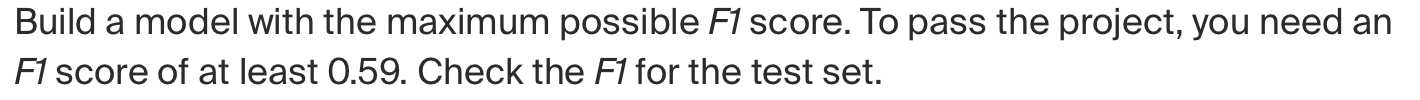

The F1 score now indicates that the model is useful, and the AUC-ROC score indicates that there is excellet discrimination. This is a normal range, and usable. 

### F. Conclusion

I have concluded that the decision tree classifier is the best model to achieve predictions that are usable with high discrimination. It is my recommendation that this model be used to predict whether or not customers will leave beta bank.

The project goal was to build a model capable of predicting churners at Beta Bank in hopes of retaining their business. I compared a few different models with different balancing techniques using the same 3:1:1 split for training, validation, and test sets.

To start with, I trained a logistic regression model on the imbalanced data to get a baseline. The F1 score was very low, which meant the model was fairly inaccurate in its predictions, flagging churners as non-churners and vice versa. This made the model useless in application. I trained it again on the imbalanced data with a balanced class weight, which was marginally helpful. F1 and AUC-ROC were improved with upsampling and resampling. Unfortunately, logistic regression did not yield results that could be applied in a business retention strategy.

I trained a decision tree using the same techniques, and the tweaked the classification threshold, which produced the beest results. The model achieved an F1 score a bit above 0.6 and an AUC-ROC above 0.83, demonstrating acceptable precision and recall that led to appropriate class separation.

I recommend using the decision tree classifier trained on the upsampled data, with threshold tuning to optimize F1. The decision tree classifier gives the most actionable results, while avoiding false positive and other issues. It will be necessary to continually monitor the performance of the model as new data becomes available, and provides a starting point that will help target and retain potential churners.

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
   

    
The conclusion is written well!     
</div>    
<div style="border: 5px solid gold; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>

    
You can make it a little broader and add more info about different models you compared. A well-written conclusion shows how the project met its objectives and provides a concise and understandable summary for those who may not have been involved in the details of the project. 

</div>  
<div style="border: 5px solid red; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
   

    
Don't forget to update it if needed. 

</div>